In [1]:
import yfinance as yf

nq100 = yf.Ticker("NQ=F")

nq = yf.Ticker("^NDX")

In [45]:
nq100_day = nq100.history(start='2022-08-20', interval='60m')
nq100_day.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [46]:
nq100_day['O-L'] = nq100_day.Open - nq100_day.Low
nq100_day['H-O'] = nq100_day.High - nq100_day.Open

In [47]:
nq100_day['tO - yC'] = nq100_day.Open - nq100_day.Close.shift(1)
# nq100_day['H-O'] = nq100_day.High - nq100_day.Open

In [48]:
nq100_day

,Open,High,Low,Close,Volume,O-L,H-O,tO - yC
Datetime,,,,,,,,
2022-08-21 18:00:00-04:00,13226.50,13226.50,13177.00,13198.25,5423,49.50,0.00,NaN
2022-08-21 19:00:00-04:00,13198.00,13211.25,13177.00,13187.25,3771,21.00,13.25,-0.25
2022-08-21 20:00:00-04:00,13187.75,13199.00,13177.50,13185.50,4299,10.25,11.25,0.50
2022-08-21 21:00:00-04:00,13185.00,13206.75,13182.75,13196.50,3973,2.25,21.75,-0.50
2022-08-21 22:00:00-04:00,13197.75,13222.75,13195.50,13219.25,3253,2.25,25.00,1.25
...,...,...,...,...,...,...,...,...
2022-10-14 13:00:00-04:00,10819.50,10853.00,10793.50,10850.50,44893,26.00,33.50,0.00
2022-10-14 14:00:00-04:00,10851.00,10851.50,10767.25,10800.25,52778,83.75,0.50,0.50
2022-10-14 15:00:00-04:00,10800.50,10824.50,10726.75,10748.00,90719,73.75,24.00,0.25


In [42]:
nq100_day[nq100_day['O-L']==0]

,Open,High,Low,Close,Volume,O-L,H-O,tO - yC
Date,,,,,,,,
2022-01-26 00:00:00-05:00,13945.5,14639.75,13945.5,14158.50,908549,0.0,694.25,-195.25
2022-05-13 00:00:00-04:00,11891.5,12432.00,11891.5,12382.75,663517,0.0,540.50,-55.75


In [43]:
nq100_day[nq100_day['H-O']==0]

,Open,High,Low,Close,Volume,O-L,H-O,tO - yC
Date,,,,,,,,
2022-02-10 00:00:00-05:00,15062.25,15062.25,14622.00,14701.000000,834478,440.25,0.0,24.00
2022-03-10 00:00:00-05:00,13778.00,13778.00,13396.25,13586.000000,611077,381.75,0.0,43.25
2022-07-11 00:00:00-04:00,12149.75,12149.75,11853.00,11884.250000,578336,296.75,0.0,-2.25
2022-08-22 00:00:00-04:00,13226.50,13226.50,12874.50,12909.750000,599946,352.00,0.0,-42.00
2022-09-16 00:00:00-04:00,11880.00,11880.00,11750.50,11814.580078,754923,129.50,0.0,-54.75


In [34]:
nq100_day.describe()

,Open,High,Low,Close,Volume,O-L,H-O
count,199.000000,199.000000,199.000000,199.000000,1.990000e+02,199.000000,199.000000
mean,13144.878391,13316.868390,12922.259044,13115.295373,6.676191e+05,222.619347,171.989999
std,1324.841709,1316.832635,1303.330193,1314.949582,1.613812e+05,165.167391,135.306699
min,10859.000000,10976.750000,10484.750000,10746.250000,1.251600e+05,0.000000,0.000000
25%,12031.625000,12180.375000,11850.625000,12013.250000,5.680405e+05,96.000000,69.375000
50%,12974.250000,13183.750000,12825.750000,12962.500000,6.542780e+05,191.000000,136.500000
75%,14180.875000,14354.875000,13908.875000,14161.625000,7.633765e+05,336.125000,240.000000
max,16497.750000,16564.000000,16292.000000,16485.500000,1.323080e+06,795.000000,694.250000


In [35]:
import matplotlib as plt

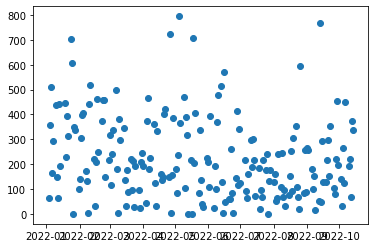

In [36]:
plt.pyplot.scatter(nq100_day.index, nq100_day['O-L'])

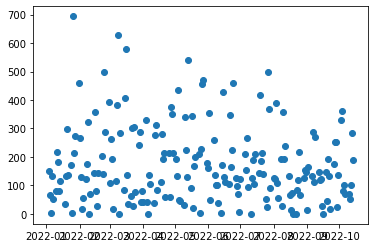

In [37]:
plt.pyplot.scatter(nq100_day.index, nq100_day['H-O'])

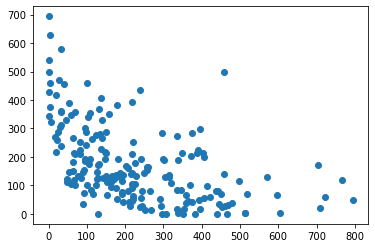

In [44]:
plt.pyplot.scatter(nq100_day['O-L'], nq100_day['H-O'])